In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
dataPath = "../Lab 5 - Bag of Words/train_data.csv"

train_data_df= pd.read_csv(dataPath)

In [14]:
X = train_data_df['text']
y = train_data_df['label']

In [15]:
label2id = {'Ireland': 0, 'England': 1,  'Scotland': 2}
y = [label2id[label] for label in y]

# Preprocesarea Datelor

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from simplemma import lang_detector, lemmatize

# nltk.download('stopwords')

german_stopwords = stopwords.words('german')
italian_stopwords = stopwords.words('italian')
spanish_stopwords = stopwords.words('spanish')
dutch_stopwords = stopwords.words('dutch')
danish_stopwords = stopwords.words('danish')

stop_words = {'de': german_stopwords, 'it': italian_stopwords, 'es': spanish_stopwords, 'nl': dutch_stopwords, 'da': danish_stopwords}


In [17]:
lang2id = {'de': 'german', 'it': 'italian', 'es': 'spanish', 'nl': 'dutch', 'da': 'danish', 'unk': 'german'}

In [18]:
def preprocesare_text(text):
    
    language = lang_detector(text, lang=('de', 'it', 'es', 'nl', 'da'))
    if language[0][0] == 'unk':
        print(text)
    language = language[0][0]

    # text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.findall(r'\w+', text) 

    text = [word for word in text if len(word) > 1]
    text = [word for word in text if word not in stop_words[language]]

    text = [lemmatize(word, language) for word in text]
    # stemmer = nltk.stem.SnowballStemmer(lang2id[language])
    # text = [stemmer.stem(word) for word in text]

    text = ' '.join(text)
    text = text.lower() # Lematizarea nu reuseste in germana pentru substantive lowercase

    return text

In [19]:
# X_stop = [preprocesare_text(text) for text in X]
# np.save('X_stop.npy', X_stop)

# X_stop_digits = [preprocesare_text(text) for text in X]
# np.save('X_stop_digits.npy', X_stop_digit)

# X_stop_digits_lemma = [preprocesare_text(text) for text in X]
# np.save('X_stop_digits_lemma.npy', X_stop_digits_lemma)

X_stop_lemma = [preprocesare_text(text) for text in X]
# np.save('X_stop_lemma.npy', X_stop_lemma)


# X_stop_stem = [preprocesare_text(text) for text in X]
# np.save('X_stop_stem.npy', X_stop_stem)

KeyboardInterrupt: 

In [20]:
y = np.load('y.npy', allow_pickle=True)
X_stop_lemma = np.load('X_stop_lemma.npy', allow_pickle=True)

In [ ]:
import nltk 
from nltk.stem.snowball import SnowballStemmer

print(" ".join(SnowballStemmer.languages))

stemmer = SnowballStemmer("german")
stemmer.stem("Erklärung")

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


'erklar'

In [ ]:
lemmatize('Erklarungen', 'de')
lemmatize('leaves', 'en')

'leave'

In [ ]:
print(X_stop_stem[9000])
print(X.iloc[9000])

herr prasident entgeg rat parlament herrn radwan nam ppe de fraktion eingereicht anderungsantrag komitologi bericht angenomm in erklar aussprach gest abend kommission ansicht ander ausgehandelt vereinbar wahrheit unterlauf saboti das mag vielleicht sogar herrn radwan absicht weiss ander bezieht parlament angenomm entschliess annahm auflosungsklauseln delegier rechtsvorschrift vorsieht systemat rechtsakt gelt sektor finanzdienstleist verabschied ich mocht kommission jedoch dringend rat uberreaktion vermeid der angenomm anderungsantrag bedau betraf ledig ander erwag fruh diesbezug entschliess verweis wir bekraft parlament entschliess billig dies nuanc kommission lag versetz text akzepti davon auszugeh ausgehandelt vereinbar weiterhin gilt


   – Herr Präsident! Entgegen meinem Rat hat das Parlament den von Herrn Radwan im Namen der PPE-DE-Fraktion eingereichten Änderungsantrag zu meinem Komitologie-Bericht angenommen.

In ihrer Erklärung in der Aussprache gestern Abend war die Kommission

In [ ]:
print(X_stop[0])
print()
print(X_stop_digits[0])
print()
print(X_stop_digits_lemma[0])
print()
print(X_stop_lemma[0])
print()
print(X_stop_stem[0])

fremragende initiativ støtter fuldt målet fremhæve idrættens pædagogiske rolle kan opnås store fordele ved etablere partnerskaber mellem undervisningssektorens idrættens organisationer irsk medlem specielt glad forslaget går dedikere 2004 idrættens pædagogiske dimension falder sammen irske formandskab første halvdel 2004 kan forsikre kolleger irland spille fremtrædende rolle planlagte initiativer irland lang tradition sport særligt amatør frivillig basis klar række store sportsbegivenheder løber stabelen 2004 afholdes em fodbold olympiske paraolympiske lege athen forslaget anses 2003 forberedende år visse aktiviteter indtræder akademiske år 2003 2004 irland vært special olympics 2003 eu bidrag organiseringen lege værd rose atleterne 160 internationale delegationer verden enestående sportslig kulturel begivenhed

fremragende initiativ støtter fuldt målet fremhæve idrættens pædagogiske rolle kan opnås store fordele ved etablere partnerskaber mellem undervisningssektorens idrættens organi

In [21]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_stop_lemma, y, test_size=0.2, random_state=42)

In [22]:
# Term Frequency-Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 100000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [23]:
# Logistic
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))


0.7122925186432524


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[1081  929   99]
 [ 163 4212  132]
 [ 126  943  629]]


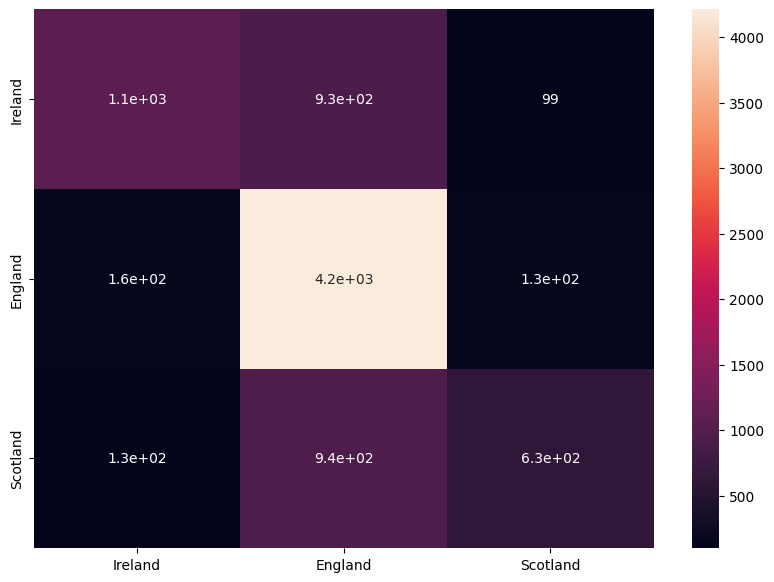

In [25]:
#heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in label2id.keys()],
columns = [i for i in label2id.keys()])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
print(cm)


